In [86]:
import numpy as np
import json
import sys
import os
import mayavi
import h5py
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import rc
rc('font',**{'family':'serif','serif':['Times New Roman']})
rc('text', usetex=True)
rc('font', size=18)

with open('50/setup.json') as f:
    data = json.load(f)

input_path  = "inputs/"
case_list   = data["exec_list"]

# Plot 2 subfigures
## plot 50 data

In [65]:

ca = '50/'
# DTMOF
nn = h5py.File(ca+'MOFNN/output.h5','r')
frame = 1
str_frame = "%.6f" % frame
if str_frame[0] == '0':
    str_frame = str_frame[1:]
phi_nn50 = np.array(nn['phi'][str_frame])[12,:,:]
# BFGS
bfgs = h5py.File(ca+'MOFBFGS/output.h5','r')
frame = 1
str_frame = "%.6f" % frame
if str_frame[0] == '0':
    str_frame = str_frame[1:]
phi_bfgs50 = np.array(bfgs['phi'][str_frame])[12,:,:]
# ELVIRA
elvira = h5py.File(ca+'ELVIRA/output.h5','r')
frame = 1
str_frame = "%.6f" % frame
if str_frame[0] == '0':
    str_frame = str_frame[1:]
phi_elvira50 = np.array(elvira['phi'][str_frame])[12,:,:]
# exact
exact_data_file = input_path+"input50.h5"
init = h5py.File(exact_data_file,'r')
phi_init50 = np.transpose(np.array(init['phi']['init']))[:,:,12]
init.close()

x50,y50 =np.meshgrid(np.arange(50)+0.5/50.0,np.arange(50)+0.5/50.0)


(50, 50)

# Plot 2 subfigures
## plot 50 data

In [79]:
ca = '50/'
# DTMOF
nn = h5py.File(ca+'MOFNN/output.h5','r')
frame = 1
str_frame = "%.6f" % frame
if str_frame[0] == '0':
    str_frame = str_frame[1:]
phi_nn50 = np.array(nn['phi'][str_frame])[12,:,:]
# BFGS
bfgs = h5py.File(ca+'MOFBFGS/output.h5','r')
frame = 1
str_frame = "%.6f" % frame
if str_frame[0] == '0':
    str_frame = str_frame[1:]
phi_bfgs50 = np.array(bfgs['phi'][str_frame])[12,:,:]
# ELVIRA
elvira = h5py.File(ca+'ELVIRA/output.h5','r')
frame = 1
str_frame = "%.6f" % frame
if str_frame[0] == '0':
    str_frame = str_frame[1:]
phi_elvira50 = np.array(elvira['phi'][str_frame])[12,:,:]
# exact
exact_data_file = input_path+"input50.h5"
init = h5py.File(exact_data_file,'r')
phi_init50 = np.transpose(np.array(init['phi']['init']))[:,:,12]
init.close()

x50,y50 = np.meshgrid((np.arange(50)+0.5)/50.0,(np.arange(50)+0.5)/50.0)

In [83]:
ca = '50/'
# DTMOF
nn = h5py.File(ca+'MOFNN/output.h5','r')
frame = 1
str_frame = "%.6f" % frame
if str_frame[0] == '0':
    str_frame = str_frame[1:]
phi_nn100 = np.array(nn['phi'][str_frame])[12,:,:]
# BFGS
bfgs = h5py.File(ca+'MOFBFGS/output.h5','r')
frame = 1
str_frame = "%.6f" % frame
if str_frame[0] == '0':
    str_frame = str_frame[1:]
phi_bfgs100 = np.array(bfgs['phi'][str_frame])[12,:,:]
# ELVIRA
elvira = h5py.File(ca+'ELVIRA/output.h5','r')
frame = 1
str_frame = "%.6f" % frame
if str_frame[0] == '0':
    str_frame = str_frame[1:]
phi_elvira100 = np.array(elvira['phi'][str_frame])[12,:,:]
# exact
exact_data_file = input_path+"input50.h5"
init = h5py.File(exact_data_file,'r')
phi_init100 = np.transpose(np.array(init['phi']['init']))[:,:,12]
init.close()

x100,y100 = np.meshgrid((np.arange(50)+0.5)/50.0,(np.arange(50)+0.5)/50.0)

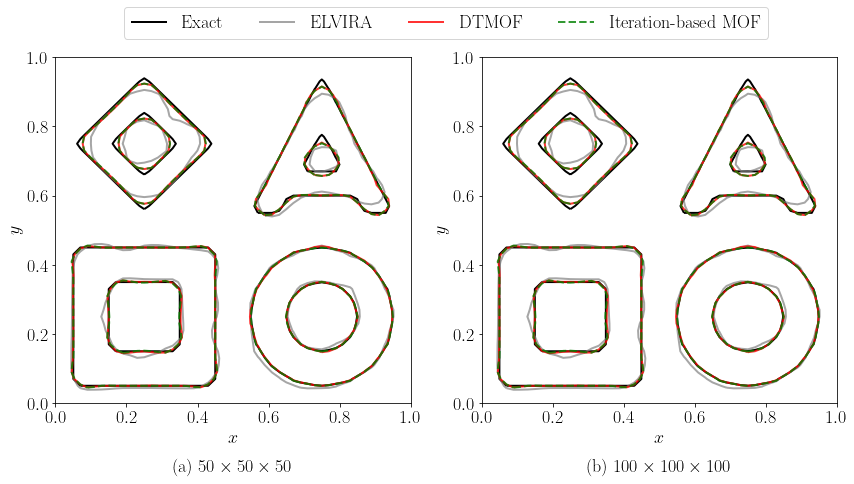

In [111]:
plt.figure(figsize=[14,14])
plt.subplot(221)

# equivalent but more general
ax1=plt.subplot(2,2,1)
ax2=plt.subplot(2,2,2)

# plot
cs1 = ax1.contour(x50,y50,phi_init50,levels=[0.5],colors='k',linewidths=2)
cs2 = ax1.contour(x50,y50,np.transpose(phi_elvira50),levels=[0.5],colors='gray',linewidths=2,alpha=0.7)
cs3 = ax1.contour(x50,y50,np.transpose(phi_nn50),levels=[0.5],colors='r',linewidths=2,alpha=0.8)
cs4 = ax1.contour(x50,y50,np.transpose(phi_bfgs50),levels=[0.5],colors='g',linestyles='dashed',linewidths=2,alpha=0.8)

cs1 = ax2.contour(x100,y100,phi_init50,levels=[0.5],colors='k',linewidths=2)
cs2 = ax2.contour(x100,y100,np.transpose(phi_elvira50),levels=[0.5],colors='gray',linewidths=2,alpha=0.7)
cs3 = ax2.contour(x100,y100,np.transpose(phi_nn50),levels=[0.5],colors='r',linewidths=2,alpha=0.8)
cs4 = ax2.contour(x100,y100,np.transpose(phi_bfgs50),levels=[0.5],colors='g',linestyles='dashed',linewidths=2,alpha=0.8)

ax1.set_xbound([0,1])
ax1.set_ybound([0,1])
ax1.set_xlabel(r'$x$')
ax1.set_ylabel(r'$y$')
ax1.text(0.5, -0.2, r'(a) $50 \times 50 \times 50$',ha='center')

cs1.collections[0].set_label('Exact')
cs2.collections[0].set_label('ELVIRA')
cs3.collections[0].set_label('DTMOF')
cs4.collections[0].set_label('Iteration-based MOF')
ax2.set_xbound([0,1])
ax2.set_ybound([0,1])
ax2.set_xlabel(r'$x$')
ax2.set_ylabel(r'$y$')
ax2.text(0.5, -0.2, r'(b) $100 \times 100 \times 100$',ha='center')
ax2.legend(ncol=4,bbox_to_anchor=(-0.1, 1.1),loc='center')
